In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import requests
import numbers
import math
import seaborn as sns


In [2]:
%config InlineBackend.figure_format = 'retina'

### 데이터 불러오기

In [3]:
file = glob.glob('./data/*.csv')
file

['./data/olist_sellers_dataset.csv',
 './data/product_category_name_translation.csv',
 './data/olist_orders_dataset.csv',
 './data/olist_order_items_dataset.csv',
 './data/review.csv',
 './data/olist_customers_dataset.csv',
 './data/review_sm.csv',
 './data/olist_geolocation_dataset.csv',
 './data/olist_order_payments_dataset.csv',
 './data/olist_order_reviews_dataset.csv',
 './data/olist_products_dataset.csv']

In [4]:
order = pd.read_csv(file[2])
products = pd.read_csv(file[10])
item = pd.read_csv(file[3])
customers = pd.read_csv(file[5])
sellers = pd.read_csv(file[0])
geolocation = pd.read_csv(file[7])
review = pd.read_csv(file[9])

In [5]:
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### 데이터 전처리

In [6]:
orders_df = order[["order_id","customer_id", "order_purchase_timestamp", "order_estimated_delivery_date"]]

In [7]:
# datetime 형식으로 변경
orders_df["order_purchase_date"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_94410/3764511771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["order_purchase_date"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_94410/3764511771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["order_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])


In [8]:
# 배송 기간 칼럼 추가
orders_df["delivery_period"] = orders_df["order_delivery_date"]-orders_df["order_purchase_date"]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_94410/1061266102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["delivery_period"] = orders_df["order_delivery_date"]-orders_df["order_purchase_date"]


In [9]:
orders_df["delivery_period"] = orders_df["delivery_period"].dt.days

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_94410/2377362812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["delivery_period"] = orders_df["delivery_period"].dt.days


In [10]:
orders_df

,order_id,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_purchase_date,order_delivery_date,delivery_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-02 10:56:33,2017-10-18,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-07-24 20:41:37,2018-08-13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-08 08:38:49,2018-09-04,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-11-18 19:28:06,2017-12-15,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-13 21:18:39,2018-02-26,12
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-28 00:00:00,2017-03-09 09:54:05,2017-03-28,18
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-03-02 00:00:00,2018-02-06 12:58:58,2018-03-02,23
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-27 00:00:00,2017-08-27 14:46:43,2017-09-27,30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-02-15 00:00:00,2018-01-08 21:28:27,2018-02-15,37


In [11]:
# 필요없는 칼럼 삭제
orders_df = orders_df.drop(columns=["order_purchase_timestamp","order_estimated_delivery_date","order_purchase_date","order_delivery_date"])

In [12]:
orders_df

,order_id,customer_id,delivery_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,12
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,18
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,23
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,37


In [13]:
item_df = item[["order_id", "seller_id"]]

In [14]:
# merge
oi_df = pd.merge(orders_df, item_df , on="order_id", how = "outer")

In [15]:
oi_df

,order_id,customer_id,delivery_period,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,19,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,26,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,26,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,12,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,23,1f9ab4708f3056ede07124aad39a2554
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,30,d50d79cb34e38265a8649c383dcffd48
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,37,a1043bafd471dff536d0c462352beb48
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,37,a1043bafd471dff536d0c462352beb48


In [16]:
customers_df = customers[["customer_id","customer_city"]]

In [17]:
oic_df = pd.merge(oi_df, customers_df, on = "customer_id", how="outer")

In [18]:
oic_df

,order_id,customer_id,delivery_period,seller_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,19,289cdb325fb7e7f891c38608bf9e0962,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,26,4869f7a5dfa277a7dca6462dcf3b52b2,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,26,66922902710d126a0e7d26b0e3805106,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,12,2c9e548be18521d1c43cde1c582c6de8,santo andre
...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,23,1f9ab4708f3056ede07124aad39a2554,praia grande
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,30,d50d79cb34e38265a8649c383dcffd48,nova vicosa
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,37,a1043bafd471dff536d0c462352beb48,japuiba
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,37,a1043bafd471dff536d0c462352beb48,japuiba


In [19]:
sellers_df = sellers[["seller_id","seller_city"]]

In [20]:
oics_df = pd.merge(oic_df, sellers_df, on= "seller_id", how = "outer")

In [21]:
oics_df

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,12,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,12,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,10,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,26,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua
...,...,...,...,...,...,...
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,18,babcc0ab201e4c60188427cae51a5b8b,ferraz de vasconcelos,porto ferreira
113421,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,18,8501d82f68d23148b6d78bb7c4a42037,gaspar,blumenau
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,22,d263fa444c1504a75cbca5cc465f592a,fortaleza,americana
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,16,edf3fabebcc20f7463cc9c53da932ea8,teofilo otoni,sao paulo


In [22]:
# 결측치 제거
oics_df = oics_df.dropna()

In [23]:
# 중복값 제거
geolocation = geolocation.drop_duplicates(["geolocation_city"], ignore_index = True)

In [24]:
# customer용, seller용 구분하기 위해 복사
geolocation_c = geolocation.copy()
geolocation_s = geolocation.copy()

In [25]:
geolocation_c.rename(columns={"geolocation_lat":"customer_lat","geolocation_lng":"customer_lng","geolocation_city":"customer_city"}, inplace=True)

In [26]:
geolocation_s.rename(columns={"geolocation_lat":"seller_lat","geolocation_lng":"seller_lng","geolocation_city":"seller_city"}, inplace=True)

In [27]:
geolocation_c = geolocation_c[["customer_city","customer_lat","customer_lng"]]

In [28]:
geolocation_s = geolocation_s[["seller_city","seller_lat","seller_lng"]]

In [29]:
geolocation_c

,customer_city,customer_lat,customer_lng
0,sao paulo,-23.545621,-46.639292
1,são paulo,-23.547762,-46.635361
2,sao bernardo do campo,-23.556812,-46.657135
3,jundiaí,-23.216648,-46.861371
4,taboão da serra,-23.574798,-46.650106
...,...,...,...
8006,ibiaçá,-28.053148,-51.861135
8007,santa cecilia do sul,-28.160371,-51.936922
8008,ciríaco,-28.342325,-51.876023
8009,estação,-27.921611,-52.264586


In [30]:
geolocation_s

,seller_city,seller_lat,seller_lng
0,sao paulo,-23.545621,-46.639292
1,são paulo,-23.547762,-46.635361
2,sao bernardo do campo,-23.556812,-46.657135
3,jundiaí,-23.216648,-46.861371
4,taboão da serra,-23.574798,-46.650106
...,...,...,...
8006,ibiaçá,-28.053148,-51.861135
8007,santa cecilia do sul,-28.160371,-51.936922
8008,ciríaco,-28.342325,-51.876023
8009,estação,-27.921611,-52.264586


In [31]:
oics_df

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,12,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,12,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,10,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,26,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua
...,...,...,...,...,...,...
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,18,babcc0ab201e4c60188427cae51a5b8b,ferraz de vasconcelos,porto ferreira
113421,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,18,8501d82f68d23148b6d78bb7c4a42037,gaspar,blumenau
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,22,d263fa444c1504a75cbca5cc465f592a,fortaleza,americana
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,16,edf3fabebcc20f7463cc9c53da932ea8,teofilo otoni,sao paulo


In [32]:
oicsg_df = pd.merge(oics_df, geolocation_c, on = "customer_city", how = "left")

In [33]:
oicsg_df = pd.merge(oicsg_df, geolocation_s, on = "seller_city", how = "left")

In [34]:
oicsg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         112650 non-null  object 
 1   customer_id      112650 non-null  object 
 2   delivery_period  112650 non-null  int64  
 3   seller_id        112650 non-null  object 
 4   customer_city    112650 non-null  object 
 5   seller_city      112650 non-null  object 
 6   customer_lat     112581 non-null  float64
 7   customer_lng     112581 non-null  float64
 8   seller_lat       111023 non-null  float64
 9   seller_lng       111023 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.5+ MB


In [35]:
# 결측치 제거
oicsg_df = oicsg_df.dropna()

In [36]:
oicsg_df.shape

(110959, 10)

In [37]:
# 경도, 위도 값 이용하여 거리 구하는 함수
class GeoUtil:
    """
    Geographical Utils
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)*100

In [38]:
# 거리 계산
distance = []
for i,j,a,b in zip(oicsg_df["customer_lng"],oicsg_df["customer_lat"],oicsg_df["seller_lng"],oicsg_df["seller_lat"]):
    distance.append(GeoUtil.get_harversion_distance(i,j,a,b))

In [39]:
len(distance)

110959

In [40]:
# 거리 칼럼 추가
oicsg_df["distance"] = distance

In [41]:
oicsg_df

,order_id,customer_id,delivery_period,seller_id,customer_city,seller_city,customer_lat,customer_lng,seller_lat,seller_lng,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,15,3504c0cb71d7fa48d967e0e4c94d59d9,sao paulo,maua,-23.545621,-46.639292,-23.680114,-46.452454,24.20784
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,12,3504c0cb71d7fa48d967e0e4c94d59d9,itaquaquecetuba,maua,-23.482623,-46.374490,-23.680114,-46.452454,23.35313
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,12,3504c0cb71d7fa48d967e0e4c94d59d9,jaguariuna,maua,-22.689713,-46.982493,-23.680114,-46.452454,122.73232
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,10,3504c0cb71d7fa48d967e0e4c94d59d9,osasco,maua,-23.559508,-46.775873,-23.680114,-46.452454,35.57437
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,26,3504c0cb71d7fa48d967e0e4c94d59d9,gravatai,maua,-29.946414,-51.052914,-23.680114,-46.452454,832.79555
...,...,...,...,...,...,...,...,...,...,...,...
112645,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,18,babcc0ab201e4c60188427cae51a5b8b,ferraz de vasconcelos,porto ferreira,-23.535777,-46.372827,-21.858555,-47.484035,218.57344
112646,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,18,8501d82f68d23148b6d78bb7c4a42037,gaspar,blumenau,-26.924732,-48.960557,-26.971132,-49.076234,12.57347
112647,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,22,d263fa444c1504a75cbca5cc465f592a,fortaleza,americana,-3.725240,-38.545775,-22.753573,-47.339412,2317.96514
112648,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,16,edf3fabebcc20f7463cc9c53da932ea8,teofilo otoni,sao paulo,-17.877615,-41.500600,-23.545621,-46.639292,826.14714


In [42]:
# 이상치 제거
oicsg_df2 = oicsg_df[(oicsg_df["distance"]<4000)]

### 데이터 시각화

<AxesSubplot: xlabel='distance', ylabel='delivery_period'>

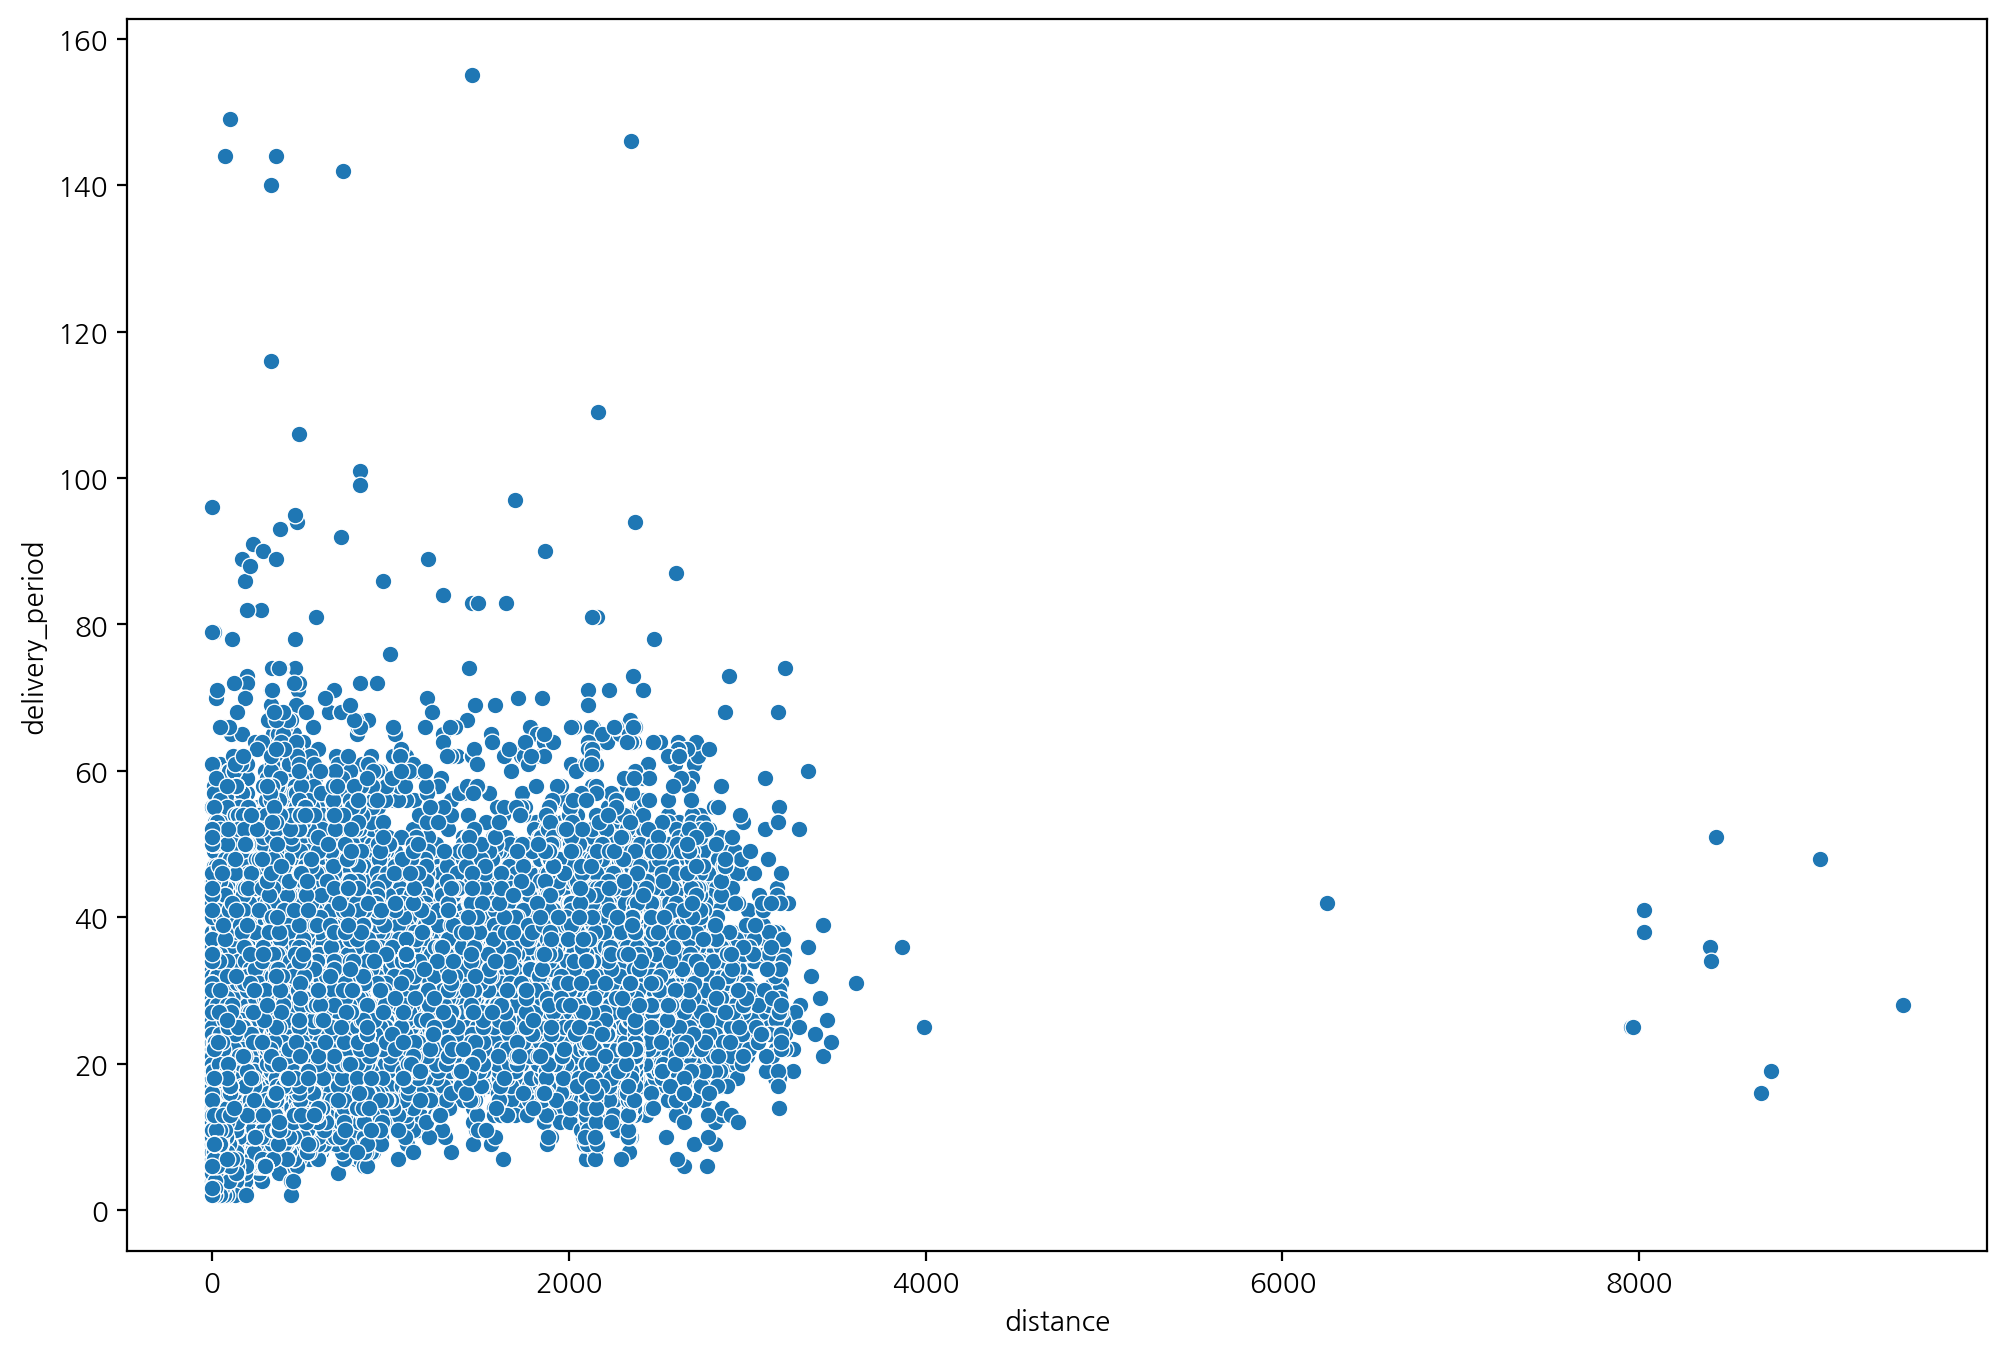

In [43]:
# 이상치 제거 전 시각화
plt.figure(figsize=(12,8))
sns.scatterplot(data = oicsg_df, x= "distance", y="delivery_period")

<AxesSubplot: xlabel='distance', ylabel='delivery_period'>

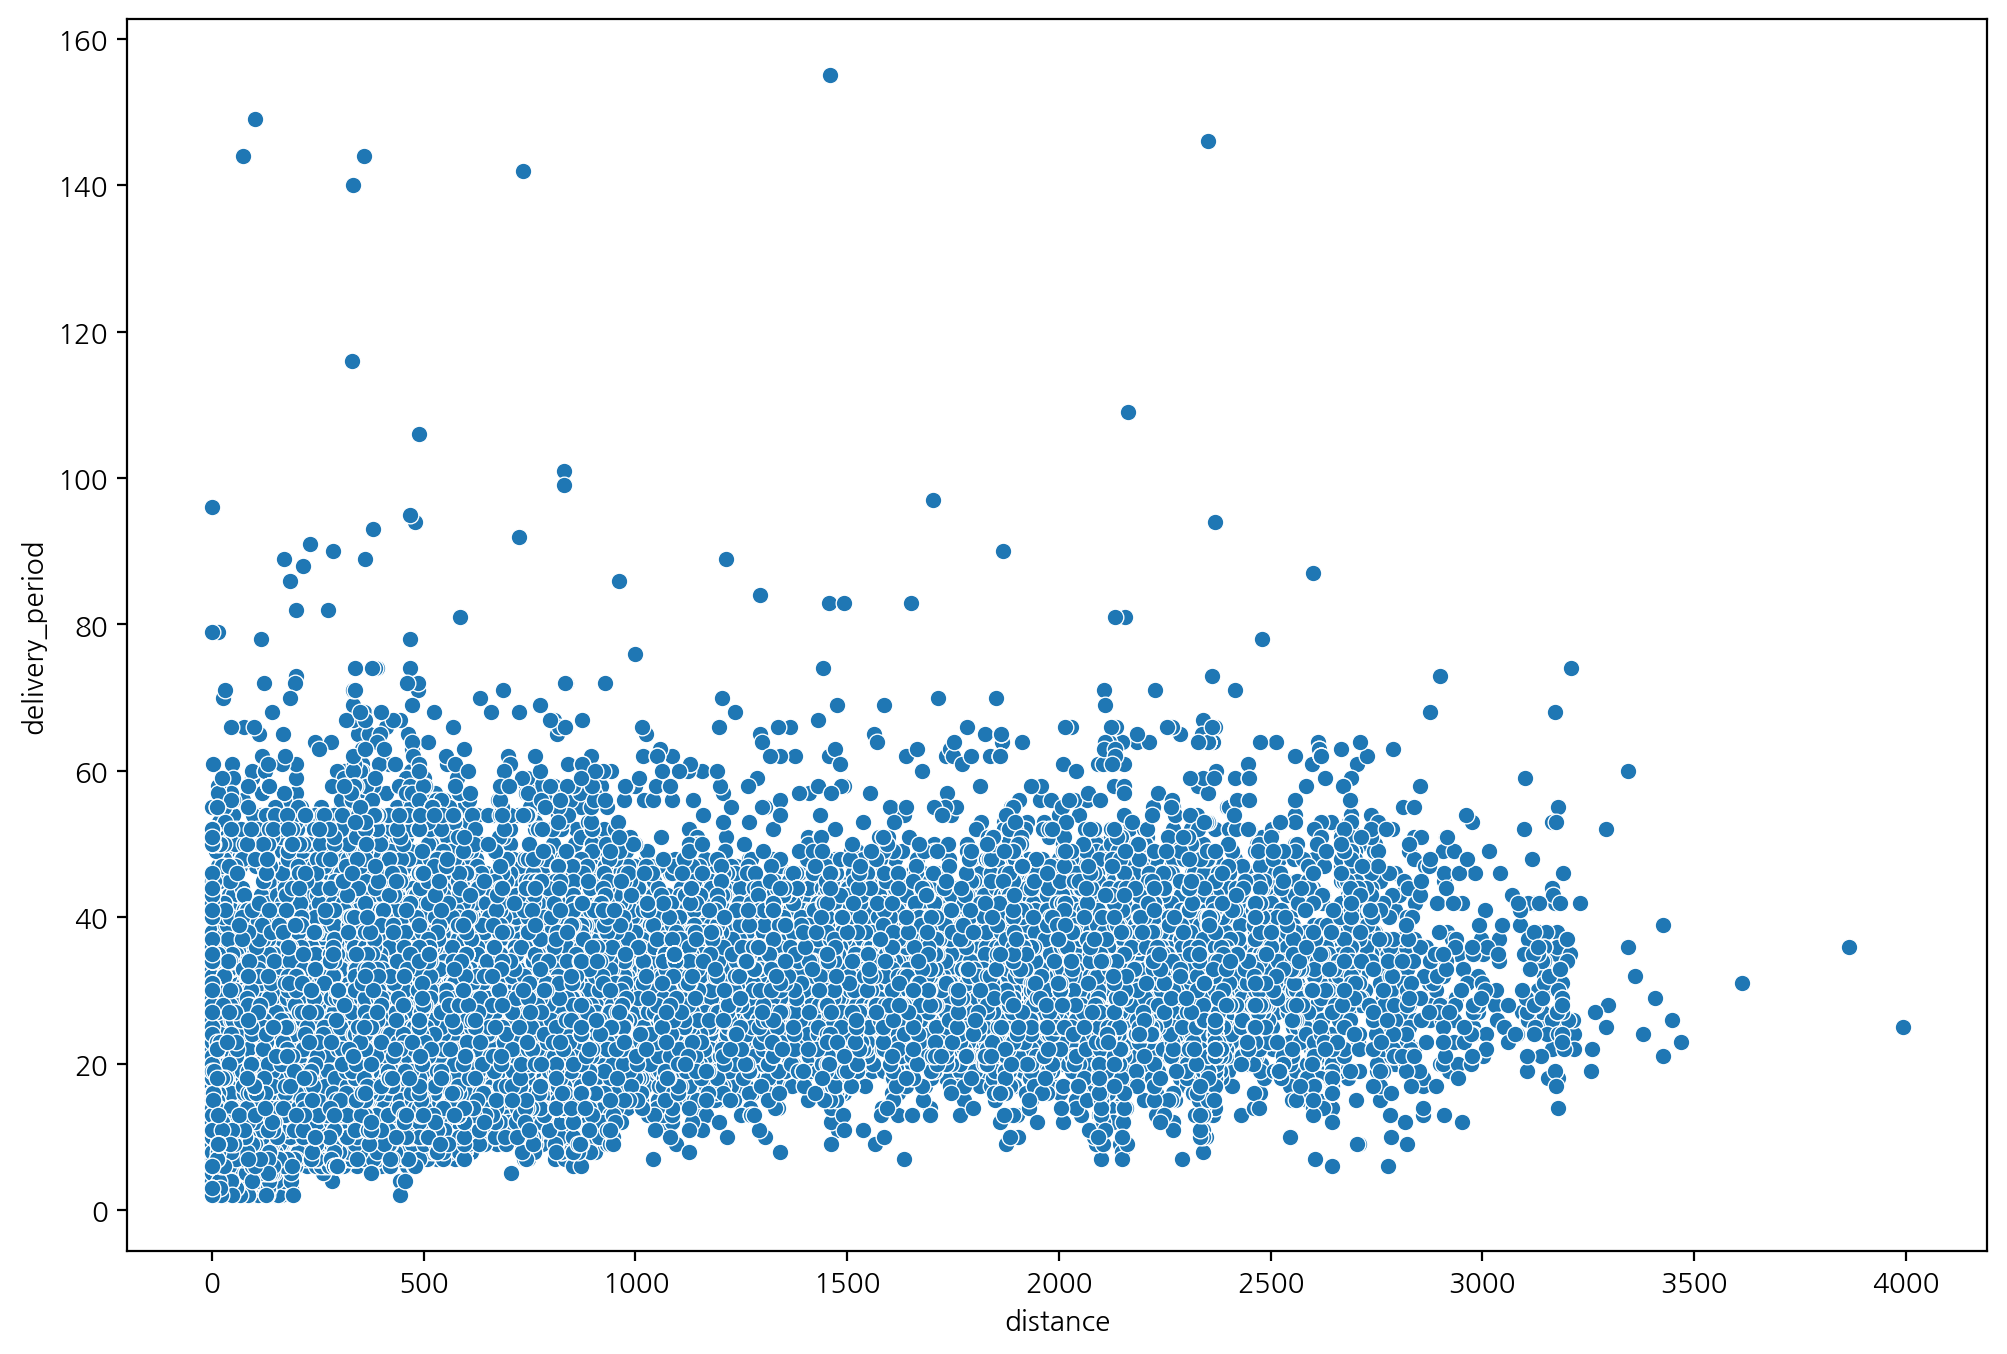

In [44]:
# 이상치 제거 후 시각화
plt.figure(figsize=(12,8))
sns.scatterplot(data = oicsg_df2, x= "distance", y="delivery_period")

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_94410/872815245.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(oicsg_df2.corr(),annot = True)


<AxesSubplot: >

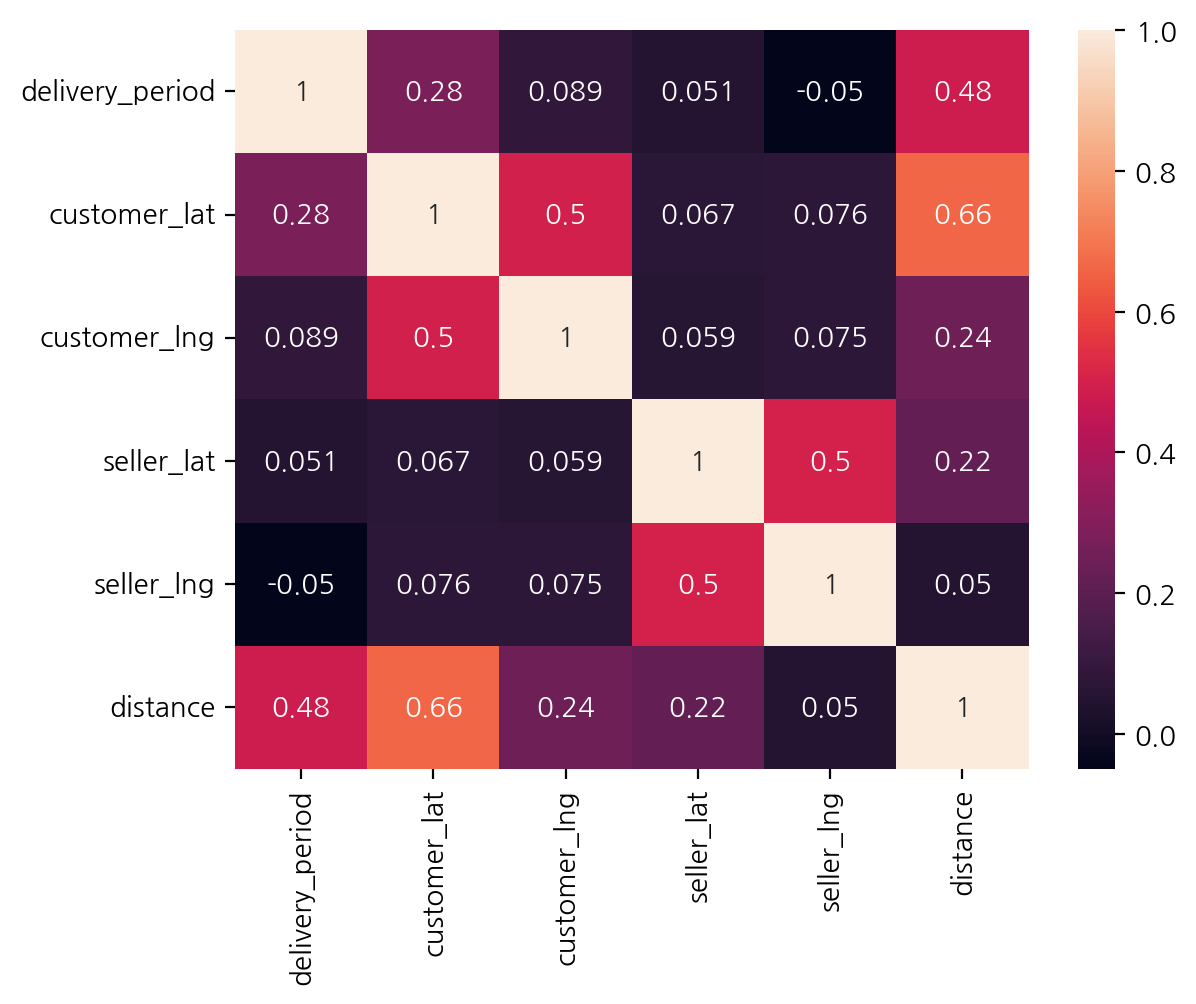

In [45]:
sns.heatmap(oicsg_df2.corr(),annot = True)

In [46]:
review_df = review[["order_id","review_score"]]

In [47]:
oicsgr_df = pd.merge(oicsg_df2, review_df, on ="order_id", how = "left")

In [48]:
oicsgr_df = oicsgr_df.drop(columns=["seller_id", "customer_id"])

In [49]:
oicsgr_df = oicsgr_df.sort_values(by = "distance", ascending= False)

In [50]:
oicsgr_df

,order_id,delivery_period,customer_city,seller_city,customer_lat,customer_lng,seller_lat,seller_lng,distance,review_score
76192,a48afd5d3f7546105c87adca63347dd4,25,santa maria,cascavel,-34.586422,-58.732101,-4.123007,-38.245152,3992.15985,5.0
47506,25c2eab805f9b909edeed8b42bd4a0dc,36,santa maria,sao luis,-34.586422,-58.732101,-2.524427,-44.290479,3865.82266,5.0
90931,de4f573359ebca3ee24bbe7cddb31052,31,camaragibe,floresta,-8.026056,-34.995573,-9.982875,-67.844628,3612.75187,5.0
86990,7d6ffa9ff53fd7da04eb9025ba231be2,23,santana do livramento,lages,-30.888468,-55.512956,-4.012780,-38.700000,3468.88895,5.0
76251,5e24cd2a73451af2660215702f8abc57,26,bage,cascavel,-31.305341,-54.111368,-4.123007,-38.245152,3447.98937,5.0
...,...,...,...,...,...,...,...,...,...,...
94084,fc83eb7b2a806cd7c4ed7abaa9af49e7,4,sao paulo,sao paulo,-23.545621,-46.639292,-23.545621,-46.639292,0.00000,1.0
106974,d2570454fa1bbea98db582b76abdc800,6,sao paulo,sao paulo,-23.545621,-46.639292,-23.545621,-46.639292,0.00000,5.0
94085,fc83eb7b2a806cd7c4ed7abaa9af49e7,4,sao paulo,sao paulo,-23.545621,-46.639292,-23.545621,-46.639292,0.00000,1.0
94086,e0a45cc3c593cdc760688f91ab70bf49,17,sao paulo,sao paulo,-23.545621,-46.639292,-23.545621,-46.639292,0.00000,5.0
